<a href="https://colab.research.google.com/github/Ivan-Nebogatikov/HumanActivityRecognitionOutliersDetection/blob/main/Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачиваем данные, преобразуем их в одну таблицу

In [ ]:
import numpy as np
import pandas as pd
import json
from datetime import datetime
from datetime import date
from math import sqrt

from zipfile import ZipFile
from os import listdir
from os.path import isfile, join

filesDir = "/content/drive/MyDrive/training_data"
csvFiles = [join(filesDir, f) for f in listdir(filesDir) if (isfile(join(filesDir, f)) and 'csv' in f)]

data = pd.DataFrame()
for file in csvFiles:
    if 'acc' in file:
        with ZipFile(file, 'r') as zipObj:
            listOfFileNames = zipObj.namelist()
            for fileName in listOfFileNames:
                if 'chest' in fileName:
                    with zipObj.open(fileName) as csvFile:
                        newData = pd.read_csv(csvFile)
                        newData['type'] = str(csvFile.name).replace('_',' ').replace('.',' ').split()[1]
                        data = data.append(newData)
                        # newData = pd.read_csv(csvFile)
                        # newColumns = [col for col in newData.columns if col not in data.columns]
                        # print(newColumns)
                        # if data.empty or not newColumns:
                        #     newData['type'] = str(csvFile.name).replace('_',' ').replace('.',' ').split()[1]
                        #     data = data.append(newData)
                        # else:
                        #     for index, newRow in newData.iterrows():
                        #         print(newRow['attr_time'])
                        #         print(data.iloc[[0]]['attr_time'])
                        #         print(len(data[data['attr_time'] < newRow['attr_time']]))
                        #         existingRow = data[data['attr_time'] <= newRow['attr_time']].iloc[-1]
                        #         existingRow[newColumns] = newRow[newColumns]                      
                        # data = data.sort_values(by=['attr_time'])
                        #print(data)
data = data.sort_values(by=['attr_time'])
print(data)

# heart = pd.read_csv('https://raw.githubusercontent.com/Ivan-Nebogatikov/HumanActivityRecognition/master/datasets/2282_3888_bundle_archive/heart.csv')
# heart['timestamp'] = heart['timestamp'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
# heart = heart.sort_values(by='timestamp')

# def getHeart(x):
#     dt = datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")
#     f = heart[heart['timestamp'] < dt]
#     lastValue = f.iloc[[-1]]['values'].tolist()[0]
#     intValue = list(json.loads(lastValue.replace('\'', '"')))[0]
#     return intValue

# acc = pd.read_csv('https://raw.githubusercontent.com/Ivan-Nebogatikov/HumanActivityRecognition/master/datasets/2282_3888_bundle_archive/acc.csv')
# acc['heart'] = acc['timestamp'].map(lambda x: getHeart(x))
# print(acc)

# def change(x):
#     if x == 'Pause' or x == 'Movie':
#         x = 'Watching TV'
#     if x == 'Shop':
#         x = 'Walk'
#     if x == 'Football':
#         x = 'Running'
#     if x == 'Meeting' or x == 'Work' or x == 'Picnic ' or x == 'In vehicle' or x == 'In bus' :
#         x = 'Sitting'
#     if x == 'On bus stop':
#         x = 'Walk'
#     if x == 'Walking&party' or x == 'Shopping& wearing' or x == 'At home':
#         x = 'Walk'
#     return x
# acc['act'] = acc['act'].map(lambda x: change(x))

# labels = np.array(acc['act'])

# arrays = acc['values'].map(lambda x: getValue(x))
# x = getDiff(list(arrays.map(lambda x: np.double(x[0]))))
# y = getDiff(list(arrays.map(lambda x: np.double(x[1]))))
# z = getDiff(list(arrays.map(lambda x: np.double(x[2]))))
# dist = list(map(lambda a, b, c: sqrt(a*a+b*b+c*c), x, y, z))

          id      attr_time    attr_x    attr_y    attr_z        type
0          1  1435990454117  0.565032  9.643246  1.301249  climbingup
1          2  1435990454137  0.565630  9.632472  1.302446  climbingup
2          3  1435990454157  0.560842  9.616910  1.315015  climbingup
3          4  1435990454188  0.553659  9.599552  1.298256  climbingup
4          5  1435990454208  0.553659  9.601946  1.293467  climbingup
...      ...            ...       ...       ...       ...         ...
31414  31415  1438191215897 -3.183091  8.975862  1.445499       lying
31415  31416  1438191215923 -3.148974  8.924985  1.595735       lying
31416  31417  1438191215941 -3.223793  8.966884  1.678335       lying
31417  31418  1438191215959 -3.280655  8.953117  1.451485       lying
31418  31419  1438191215981 -3.160945  8.998009  1.451485       lying

[221613 rows x 6 columns]


In [ ]:
labels = np.array(data['type'])

In [ ]:
data['time_diff'] = data['attr_time'].diff()

indMin = int(data[['time_diff']].idxmin())
print(indMin)
t_j = data.iloc[indMin]['attr_time']
print(t_j)
t_j1 = data.iloc[indMin+1]['attr_time']

diff = t_j1 - t_j
print(diff)

# interpolated =  []
data['attr_x_i'] = data.apply(lambda row: (t_j1 - row['attr_time']) * row['attr_x'] / diff + (row['attr_time'] - t_j) * row['attr_x'] / diff, axis=1) # !!! тут нужен +1 строка
data['attr_y_i'] = data.apply(lambda row: (t_j1 - row['attr_time']) * row['attr_y'] / diff + (row['attr_time'] - t_j) * row['attr_y'] / diff, axis=1)
data['attr_z_i'] = data.apply(lambda row: (t_j1 - row['attr_time']) * row['attr_z'] / diff + (row['attr_time'] - t_j) * row['attr_z'] / diff, axis=1)
# # for i, row in data.iterrows():
# #     t_i = row['attr_time']
# #     def axis(value): (t_j1 - t_i) * value / (t_j1 - t_j) + (t_i + t_j) * value / (t_j1 + t_j)
# #     interpolated.append([row["id"], row['attr_time'], axis(row['attr_x']), axis(row['attr_y']), axis(row['attr_z']),  row['type'], row['time_diff']])

print(data)


29
1435990454718
1
          id      attr_time    attr_x  ...  attr_x_i  attr_y_i  attr_z_i
0          1  1435990454117  0.565032  ...  0.565032  9.643246  1.301249
1          2  1435990454137  0.565630  ...  0.565630  9.632472  1.302446
2          3  1435990454157  0.560842  ...  0.560842  9.616910  1.315015
3          4  1435990454188  0.553659  ...  0.553659  9.599552  1.298256
4          5  1435990454208  0.553659  ...  0.553659  9.601946  1.293468
...      ...            ...       ...  ...       ...       ...       ...
31414  31415  1438191215897 -3.183091  ... -3.183091  8.975861  1.445499
31415  31416  1438191215923 -3.148974  ... -3.148973  8.924984  1.595736
31416  31417  1438191215941 -3.223793  ... -3.223792  8.966885  1.678335
31417  31418  1438191215959 -3.280655  ... -3.280655  8.953117  1.451485
31418  31419  1438191215981 -3.160945  ... -3.160945  8.998009  1.451485

[221613 rows x 10 columns]


In [ ]:
data['g_x'] = data['attr_x_i'].rolling(window=5).mean()
data['g_y'] = data['attr_y_i'].rolling(window=5).mean()
data['g_z'] = data['attr_z_i'].rolling(window=5).mean()
print(data['g_x'])

0             NaN
1             NaN
2             NaN
3             NaN
4        0.559764
           ...   
31414   -3.208829
31415   -3.201048
31416   -3.206913
31417   -3.209786
31418   -3.199491
Name: g_x, Length: 221613, dtype: float64


In [ ]:
data['g_x'] = data['attr_x_i'].rolling(window=5).mean()
data['g_y'] = data['attr_y_i'].rolling(window=5).mean()
data['g_z'] = data['attr_z_i'].rolling(window=5).mean()
print(data['g_x'])

0             NaN
1             NaN
2             NaN
3             NaN
4        0.559764
           ...   
31414   -3.208829
31415   -3.201048
31416   -3.206913
31417   -3.209786
31418   -3.199491
Name: g_x, Length: 221613, dtype: float64


In [ ]:
import numpy as np

def acc(a, g):
    return np.cross(np.cross(a, g) / np.dot(g, g), g)

data['a_tv'] = data.apply(lambda row: acc([row.attr_x_i, row.attr_y_i, row.attr_z_i], [row.g_x, row.g_y, row.g_z]), axis=1)
data['a_th'] = data.apply(lambda row: [row.attr_x_i - row.a_tv[0], row.attr_y_i - row.a_tv[1], row.attr_z_i - row.a_tv[2]], axis=1)

print(data['a_tv'])

0                                          [nan, nan, nan]
1                                          [nan, nan, nan]
2                                          [nan, nan, nan]
3                                          [nan, nan, nan]
4        [0.005057112819241918, -0.0011310265816110463,...
                               ...                        
31414    [-0.02069019868972204, -0.01710602083571396, 0...
31415    [-0.04063326153831265, 0.00030805992402588127,...
31416    [0.004154727972981805, 0.02379860076518528, -0...
31417    [0.06656909388802254, 0.013670051238872064, 0....
31418    [-0.04103426464249009, -0.02726753010378999, 0...
Name: a_tv, Length: 221613, dtype: object


In [ ]:
print(data['a_th'])

0                                          [nan, nan, nan]
1                                          [nan, nan, nan]
2                                          [nan, nan, nan]
3                                          [nan, nan, nan]
4        [0.5486020271807942, 9.603077026582291, 1.2872...
                               ...                        
31414    [-3.162400964945532, 8.992966616538839, 1.3876...
31415    [-3.108340203427508, 8.924675918347459, 1.6835...
31416    [-3.2279468040838215, 8.943086012271925, 1.807...
31417    [-3.347224001114585, 8.939447319366597, 1.3910...
31418    [-3.119910674017178, 9.025276258131134, 1.3772...
Name: a_th, Length: 221613, dtype: object


Вспомогательная функция для вывода результатов

In [ ]:
import pandas as pd
import numpy as np
from scipy import interp

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = 5
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    print(class_report_df)
    return accuracy

Определяем функции для предсказания с использованием классификатора и с использованием нескольких классификаторов

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def Predict(x, classifier = RandomForestClassifier(n_estimators = 400, random_state = 3, class_weight='balanced')):
    train_features, test_features, train_labels, test_labels = train_test_split(x, labels, test_size = 0.15, random_state = 242)
    print('Training Features Shape:', train_features.shape)
    print('Testing Features Shape:', test_features.shape)
    print("\n")

    classifier.fit(train_features, train_labels);

    x_shuffled, labels_shuffled = shuffle(np.array(x), np.array(labels))

    scores = cross_val_score(classifier, x_shuffled, labels_shuffled, cv=7)
    print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

    predictions = list(classifier.predict(test_features))
    pred_prob = classifier.predict_proba(test_features)
    
    accuracy = class_report(
    y_true=test_labels,
    y_pred=np.asarray(predictions),
    y_score=pred_prob, average='micro')

    if hasattr(classifier, 'feature_importances_'):
        print(classifier.feature_importances_)

    plot_confusion_matrix(classifier, test_features, test_labels)
    plt.xticks(rotation = 90)
    plt.style.library['seaborn-darkgrid']
    plt.show()

    return [accuracy, scores.mean(), scores.std()]

def PredictWithClassifiers(data, classifiers):
    accuracies = {}
    for name, value in classifiers.items():
        accuracy = Predict(data, value)
        accuracies[name] = accuracy
        print("\n")
    df = pd.DataFrame({(k, v[0], v[1], v[2]) for k, v in accuracies.items()}, columns=["Method", "Accuracy", "Mean", "Std"])
    print(df)

Определяем набор используемых классификаторов

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier

methods = {
    "MLP" : MLPClassifier(random_state=1, max_iter=300),
    "K-neigh" : KNeighborsClassifier(), # default k = 5
    "Random Forest" : RandomForestClassifier(n_estimators = 400, random_state = 3, class_weight='balanced'),
    "Bayes" : GaussianNB(),
    "AdaBoost" : AdaBoostClassifier(),
    "SVM" : svm.SVC(probability=True, class_weight='balanced')
}

               x         y         z
0       0.000000  0.000000  0.000000
1       0.000000  0.000000  0.000000
2       0.000000  0.000000  0.000000
3       0.000000  0.000000  0.000000
4       0.548602  9.603077  1.287286
...          ...       ...       ...
221608 -3.162401  8.992967  1.387654
221609 -3.108340  8.924676  1.683505
221610 -3.227947  8.943086  1.807846
221611 -3.347224  8.939447  1.391044
221612 -3.119911  9.025276  1.377277

[221613 rows x 3 columns]
               x         y         z
0       0.000000  0.000000  0.000000
1       0.000000  0.000000  0.000000
2       0.000000  0.000000  0.000000
3       0.000000  0.000000  0.000000
4       0.548602  9.603077  1.287286
...          ...       ...       ...
221608 -3.162401  8.992967  1.387654
221609 -3.108340  8.924676  1.683505
221610 -3.227947  8.943086  1.807846
221611 -3.347224  8.939447  1.391044
221612 -3.119911  9.025276  1.377277

[221613 rows x 3 columns]
Training Features Shape: (188371, 3)
Testing Features Shap

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


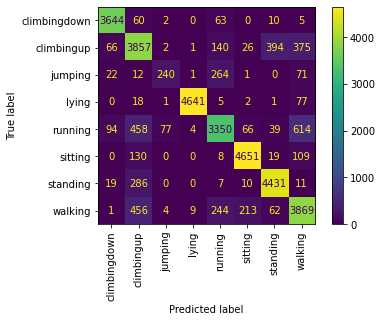



Training Features Shape: (188371, 3)
Testing Features Shape: (33242, 3)


0.852901 accuracy with a standard deviation of 0.001843
Accuracy: 0.8538595752361471
              precision    recall  f1-score  support     pred       AUC
climbingdown   0.944170  0.960888  0.952456   3784.0   3851.0  0.989125
climbingup     0.695318  0.782144  0.736180   4861.0   5468.0  0.932860
jumping        0.707729  0.479542  0.571707    611.0    414.0  0.851253
lying          0.991533  0.987144  0.989334   4745.0   4724.0  0.995364
running        0.774410  0.711825  0.741800   4702.0   4322.0  0.908024
sitting        0.946051  0.937970  0.941993   4917.0   4875.0  0.980099
standing       0.902490  0.913098  0.907763   4764.0   4820.0  0.978413
walking        0.767617  0.753396  0.760440   4858.0   4768.0  0.933075
avg / total    0.854686  0.853860  0.853285  33242.0  33242.0  0.961944


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


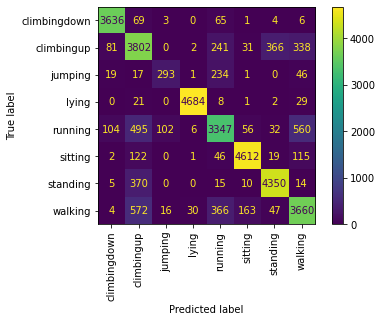



Training Features Shape: (188371, 3)
Testing Features Shape: (33242, 3)


0.862391 accuracy with a standard deviation of 0.001430
Accuracy: 0.8644485891342277
              precision    recall  f1-score  support     pred       AUC
climbingdown   0.952994  0.959038  0.956006   3784.0   3808.0  0.997515
climbingup     0.713789  0.802921  0.755736   4861.0   5468.0  0.963752
jumping        0.757493  0.454992  0.568507    611.0    367.0  0.942819
lying          0.996379  0.985880  0.991102   4745.0   4695.0  0.998537
running        0.812140  0.719906  0.763247   4702.0   4168.0  0.951611
sitting        0.955519  0.934920  0.945107   4917.0   4811.0  0.992963
standing       0.912636  0.918766  0.915690   4764.0   4796.0  0.994082
walking        0.758237  0.800535  0.778812   4858.0   5129.0  0.966262
avg / total    0.866819  0.864449  0.864057  33242.0  33242.0  0.986419
[0.39897264 0.33368333 0.26734402]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


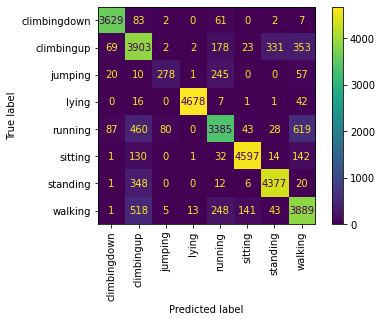



Training Features Shape: (188371, 3)
Testing Features Shape: (33242, 3)


0.699981 accuracy with a standard deviation of 0.001995
Accuracy: 0.7033271162986583
              precision    recall  f1-score  support     pred       AUC
climbingdown   0.846021  0.904598  0.874330   3784.0   4046.0  0.988026
climbingup     0.596066  0.268052  0.369803   4861.0   2186.0  0.878529
jumping        0.761905  0.026187  0.050633    611.0     21.0  0.935909
lying          0.999348  0.968599  0.983733   4745.0   4599.0  0.993501
running        0.578104  0.536793  0.556683   4702.0   4366.0  0.886345
sitting        0.682478  0.965629  0.799731   4917.0   6957.0  0.984666
standing       0.551825  0.752099  0.636582   4764.0   6493.0  0.909868
walking        0.696764  0.656031  0.675785   4858.0   4574.0  0.919713
avg / total    0.703749  0.703327  0.681976  33242.0  33242.0  0.952131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


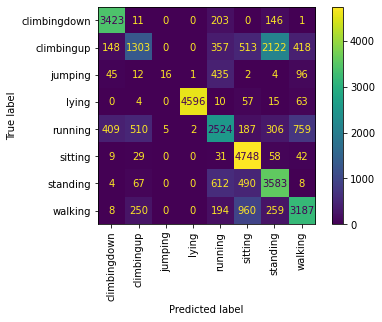



Training Features Shape: (188371, 3)
Testing Features Shape: (33242, 3)


0.608286 accuracy with a standard deviation of 0.074744
Accuracy: 0.5723482341616027
              precision    recall  f1-score  support     pred       AUC
climbingdown   0.874870  0.888742  0.881751   3784.0   3844.0  0.975282
climbingup     0.577286  0.692244  0.629560   4861.0   5829.0  0.573617
jumping        0.143345  0.274959  0.188446    611.0   1172.0  0.852030
lying          0.010469  0.004426  0.006221   4745.0   2006.0  0.951853
running        0.189961  0.246278  0.214484   4702.0   6096.0  0.675044
sitting        0.916703  0.863941  0.889540   4917.0   4634.0  0.901066
standing       0.772920  0.842359  0.806147   4764.0   5192.0  0.953890
walking        0.601924  0.553726  0.576820   4858.0   4469.0  0.693326
avg / total    0.549333  0.572348  0.558527  33242.0  33242.0  0.831914
[0.48 0.26 0.26]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


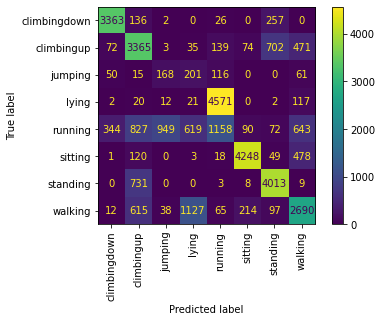



Training Features Shape: (188371, 3)
Testing Features Shape: (33242, 3)




In [ ]:
frame = pd.DataFrame(data['a_th'].to_list(), columns=['x','y','z']).fillna(0)
print(frame)
feature_list = list(frame.columns)
print(frame)

PredictWithClassifiers(frame, methods)